### Realización de experimentos de segunda fase
Experimentos realizados en `dont_give_up_2.ipynb`

In [1]:
import numpy as np
import pandas as pd
import time
import importlib

import scripts.local_environment as local
importlib.reload(local);

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
%%time
df = pd.read_csv('data/clean/train_clean.csv')
df_targets = pd.read_csv('data/clean/train_labels.csv')
df_test = pd.read_csv('data/clean/test_clean.csv')

CPU times: user 1min 15s, sys: 6.19 s, total: 1min 21s
Wall time: 1min 21s


#### Experimento 4 (v2):
Entrenamiento con los datos de Mayo 2016 con todos los clientes

In [4]:
x_train = df[df['fecha_dato'] == '2016-05-28']
y_train = df_targets.loc[x_train.index]

x = x_train.drop(['fecha_dato', 'fecha_alta'], axis=1)
y = y_train.loc[x.index].as_matrix()
x = x.as_matrix()

In [5]:
%%time
rf = local.model(x, y, RandomForestClassifier(n_jobs=4))

CPU times: user 4min 39s, sys: 16.9 s, total: 4min 56s
Wall time: 2min 26s


In [6]:
%%time
x_test = df_test.drop(['fecha_dato', 'fecha_alta'], axis=1).as_matrix()
probs, preds = local.calculatePredsProbs(x_test, rf)

CPU times: user 3min 39s, sys: 6.94 s, total: 3min 46s
Wall time: 2min 36s


In [8]:
%%time
subm, name_file = local.processPredictions(probs=probs, preds=preds, df_prev=x_train, df_test=df_test,
                                df_targets=y_train, env='submit')

CPU times: user 34.2 s, sys: 1.59 s, total: 35.8 s
Wall time: 36.9 s


#### Experimento 5 (v2)
Experimento con datos de Junio 2015 y datos refinados

In [33]:
x_train = df[df['fecha_dato'] == '2015-06-28']
y_train = df_targets.loc[x_train.index]

x = x_train.drop(['fecha_dato', 'fecha_alta'], axis=1)
y = y_train.loc[x.index].as_matrix()
x = x.as_matrix()

In [34]:
%%time
rf = local.model(x, y, RandomForestClassifier(n_jobs=4))

x_test = df_test.drop(['fecha_dato', 'fecha_alta'], axis=1).as_matrix()
probs, preds = local.calculatePredsProbs(x_test, rf)
subm, name_file = local.processPredictions(probs=probs, preds=preds, df_prev=x_train,
                                           df_test=df_test, df_targets=y_train, env='submit')

CPU times: user 5min 43s, sys: 11.7 s, total: 5min 55s
Wall time: 3min 24s


#### Resultados experimento 6 

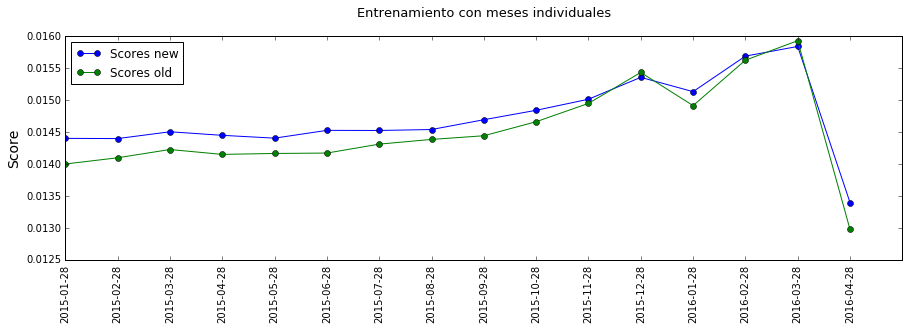

In [58]:
validation = pd.read_csv('utils/max_scoresv2.csv')
max_score = validation[validation['fecha'] == '2016-05-28'].iloc[:, -1].values

dates = df.fecha_dato.unique()
date_test = dates[-1]

res_exp6 = pd.read_csv('scripts/results/experiment6_v2.csv')
res_exp6['date'] = dates[:-1]

res_exp6_v1 = pd.read_csv('scripts/results/experiment6.csv')
res_exp6['date'] = dates[:-1]
scores_exp6_v1 = res_exp6_v1['score'].values

dates_exp6 = res_exp6['date'].values
scores_exp6 = res_exp6['score'].values

plt.figure(figsize=(15, 4))
plt.plot(scores_exp6, '-o', scores_exp6_v1, '-o')
#plt.axhline(max_score[0], color='r', )
#plt.ylim(scores_exp6.min() - 0.001, max_score[0]+0.001)
plt.xticks(range(len(dates_exp6)), dates_exp6, rotation=90)
#for i, val in enumerate(amount_data):
#    plt.text(i, score[i]+0.001, val, ha='left')
plt.title('Entrenamiento con meses individuales\n', size=13)
plt.ylabel('Score', size=14)
plt.legend(['Scores new', 'Scores old', 'Score ideal ' + '{:.5f}'.format(max_score[0])], loc=0)

In [59]:
max_index6 = list(reversed(scores_exp6.argsort()))[0]
max_score6 = scores_exp6[max_index6]

max_score6_v1 = scores_exp6_v1.max()

print('Score de experimento 6 (datos antiguos): {:<15.5f} Equivale al {:.2f}% del score ideal'.format(max_score6_v1,
                                                                                                     (max_score6_v1/max_score[0])*100))
print('Score de experimento 6 (datos "refinados"): {:<12.5f} Equivale al {:.2f}% del score ideal'.format(max_score6,
                                                                                                        (max_score6/max_score[0])*100))

Score de experimento 6 (datos antiguos): 0.01593         Equivale al 55.53% del score ideal
Score de experimento 6 (datos "refinados"): 0.01584      Equivale al 55.22% del score ideal


#### Experimento 7 

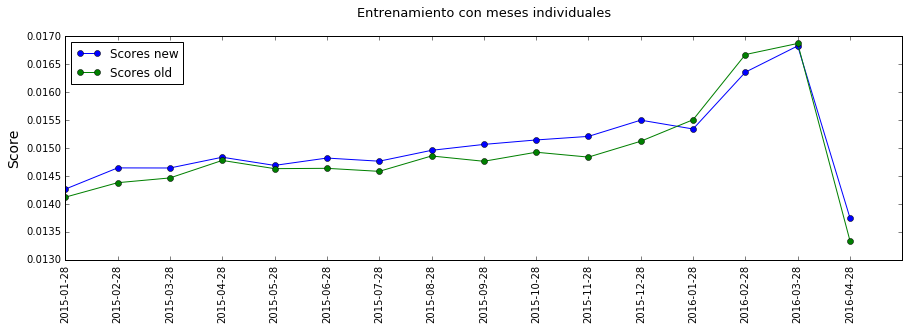

In [60]:
validation = pd.read_csv('utils/max_scoresv2.csv')
max_score = validation[validation['fecha'] == '2016-05-28'].iloc[:, -1].values

dates = df.fecha_dato.unique()
date_test = dates[-1]

res_exp7 = pd.read_csv('scripts/results/experiment7_v2.csv')
res_exp7['date'] = dates[:-1]

res_exp7_v1 = pd.read_csv('scripts/results/experiment7.csv')
res_exp7['date'] = dates[:-1]
scores_exp7_v1 = res_exp7_v1['score'].values

dates_exp7 = res_exp7['date'].values
scores_exp7 = res_exp7['score'].values

plt.figure(figsize=(15, 4))
plt.plot(scores_exp7, '-o', scores_exp7_v1, '-o')
#plt.axhline(max_score[0], color='r', )
#plt.ylim(scores_exp6.min() - 0.001, max_score[0]+0.001)
plt.xticks(range(len(dates_exp7)), dates_exp7, rotation=90)
#for i, val in enumerate(amount_data):
#    plt.text(i, score[i]+0.001, val, ha='left')
plt.title('Entrenamiento con meses individuales\n', size=13)
plt.ylabel('Score', size=14)
plt.legend(['Scores new', 'Scores old', 'Score ideal ' + '{:.5f}'.format(max_score[0])], loc=0)

In [53]:
max_index6 = list(reversed(scores_exp6.argsort()))[0]
max_score6 = scores_exp6[max_index6]

max_score6_v1 = scores_exp6_v1.max()

print('Score de experimento 6 (datos antiguos): {:<15.5f} Equivale al {:.2f}% del score ideal'.format(max_score6_v1,
                                                                                                     (max_score6_v1/max_score[0])*100))
print('Score de experimento 6 (datos "refinados"): {:<12.5f} Equivale al {:.2f}% del score ideal'.format(max_score6,
                                                                                                        (max_score6/max_score[0])*100))

Score de experimento 6 (datos antiguos): 0.01687         Equivale al 58.81% del score ideal
Score de experimento 6 (datos "refinados"): 0.01683      Equivale al 58.66% del score ideal


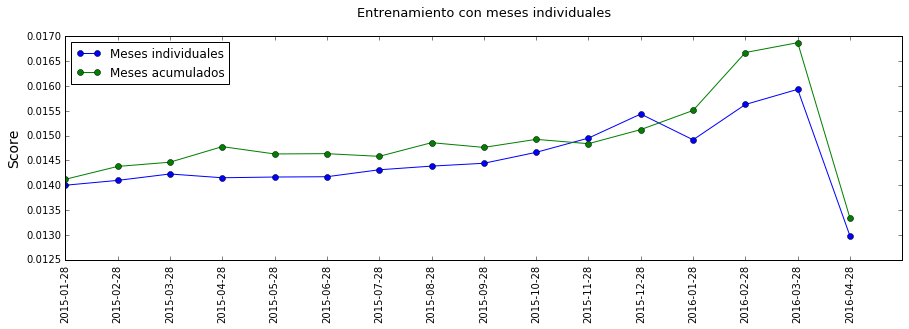

In [62]:
plt.figure(figsize=(15, 4))
plt.plot(scores_exp6_v1, '-o', scores_exp7_v1, '-o')
#plt.axhline(max_score[0], color='r', )
#plt.ylim(scores_exp6.min() - 0.001, max_score[0]+0.001)
plt.xticks(range(len(dates_exp7)), dates_exp7, rotation=90)
#for i, val in enumerate(amount_data):
#    plt.text(i, score[i]+0.001, val, ha='left')
plt.title('Entrenamiento con meses individuales\n', size=13)
plt.ylabel('Score', size=14)
plt.legend(['Meses individuales', 'Meses acumulados', 'Score ideal ' + '{:.5f}'.format(max_score[0])], loc=0)

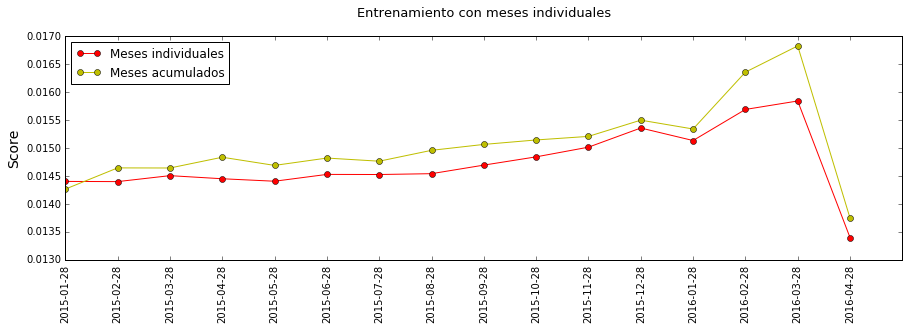

In [63]:
plt.figure(figsize=(15, 4))
plt.plot(scores_exp6, 'r-o', scores_exp7, 'y-o')
#plt.axhline(max_score[0], color='r', )
#plt.ylim(scores_exp6.min() - 0.001, max_score[0]+0.001)
plt.xticks(range(len(dates_exp7)), dates_exp7, rotation=90)
#for i, val in enumerate(amount_data):
#    plt.text(i, score[i]+0.001, val, ha='left')
plt.title('Entrenamiento con meses acumulados\n', size=13)
plt.ylabel('Score', size=14)
plt.legend(['V1', 'V2', 'V3'], loc=0)

---
### Experimento 9 
Entrenamiento con Mayo 2016 agregando los productos que tiene el cliente, ese mes, como *features*, además sólo irán los clientes antiguos

In [78]:
prev = df[df['fecha_dato'] == '2016-04-28']
last = df[df['fecha_dato'] == '2016-05-28']

ncodpers_both_month = list(set(prev['ncodpers'].values) & set(last['ncodpers'].values))

index_prev = prev.loc[prev['ncodpers'].isin(ncodpers_both_month)].index

df_aux = df_targets.loc[index_prev]
df_aux = df_aux.join(df['ncodpers'], how='inner')

last = last.merge(df_aux, on='ncodpers', how='outer', right_index=True)
last.dropna(axis=0, inplace=True)

In [68]:
x_train = last
y_train = df_targets.loc[x_train.index]

x = x_train.drop(['fecha_dato', 'fecha_alta', 'ncodpers'], axis=1).as_matrix()
y = y_train.as_matrix()

In [69]:
prev = df[df['fecha_dato'] == '2016-05-28']
last = df_test

ncodpers_both_month = list(set(prev['ncodpers'].values) & set(last['ncodpers'].values))

index_prev = prev.loc[prev['ncodpers'].isin(ncodpers_both_month)].index

df_aux = df_targets.loc[index_prev]
df_aux = df_aux.join(df['ncodpers'], how='inner')

last = last.merge(df_aux, on='ncodpers', how='outer', right_index=True)
last.fillna(0, inplace=True)

In [70]:
x_test = last.drop(['fecha_dato', 'fecha_alta', 'ncodpers'], axis=1).as_matrix()

In [71]:
x_train.shape, x_test.shape

((920194, 52), (929615, 49))

In [72]:
%%time
rf = local.model(x, y, RandomForestClassifier(n_jobs=4))
probs, preds = local.calculatePredsProbs(x_test, rf)
subm, name_file = local.processPredictions(probs=probs, preds=preds, df_prev=x_train,
                                           df_test=df_test, df_targets=y_train, env='submit')

results/submissions/2018-07-16-h19-24-53_submission.csv
CPU times: user 6min 5s, sys: 13.8 s, total: 6min 19s
Wall time: 2min 55s


### Experimento 10
Entrenamiento con Mayo 2016 y añadiendo pesos a los productos

In [95]:
df_a = df.loc[:, ['fecha_dato']].join(df_targets)
df_a.shape

(13387956, 25)

In [96]:
df_a = df_a.groupby(['fecha_dato']).sum()

In [97]:
df_b = pd.DataFrame(columns=df_a.columns.tolist()[0:]) #dataframe products prev bought
for i in range(1, len(dates)):
    prev_prods = df_a.loc[df_a.index[i-1]].as_matrix()
    act_prods = df_a.loc[df_a.index[i]].as_matrix()
    bought_prods = act_prods - prev_prods
    df_b.loc[i] = bought_prods

In [98]:
df_a = df_a.reset_index().loc[:, ['fecha_dato']].join(df_b).iloc[1:]
df_a = df_a.set_index('fecha_dato')
del df_b

Productos que se añaden o se dejan cada mes

In [99]:
df_a.head()

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
fecha_dato,,,,,,,,,,,,,,,,,,,,,
2015-02-28,1.0,1.0,1276.0,0.0,1298.0,-31.0,-157.0,-291.0,-128.0,516.0,...,-8.0,-20.0,-4.0,211.0,-1229.0,-48.0,-11.0,1776.0,1504.0,-924.0
2015-03-28,0.0,1.0,955.0,13.0,935.0,7.0,-302.0,-270.0,-161.0,361.0,...,-11.0,-20.0,0.0,220.0,646.0,-162.0,-22.0,2232.0,-672.0,2756.0
2015-04-28,-2.0,0.0,539.0,0.0,1314.0,-6.0,-342.0,-396.0,-166.0,86.0,...,-18.0,-14.0,4.0,875.0,993.0,-74.0,-19.0,-512.0,2483.0,1155.0
2015-05-28,-2.0,0.0,1134.0,0.0,1197.0,9.0,-351.0,-147.0,-120.0,-316.0,...,-155.0,-6.0,-3.0,344.0,-87.0,28.0,-17.0,-1041.0,-4101.0,-1782.0
2015-06-28,-2.0,0.0,4743.0,3.0,-3472.0,-39.0,-163.0,-285.0,-146.0,-250.0,...,-41.0,0.0,-36.0,2937.0,690.0,-270.0,-16.0,2149.0,5241.0,2216.0


#### Clases con pesos
Para cada clase se define un peso

In [126]:
weighted_class = []

purchases = df_a.loc['2016-05-28']

for p in purchases:
    if p > 0:
        weight_one = 0.6
        weight_zero = 1 - weight_one
        weighted_class.append({0: weight_zero, 1: weight_one})
    elif p < 0:
        weight_zero = 0.6
        weight_one = 1 - weight_zero
        weighted_class.append({0: weight_zero, 1: weight_one})
    else:
        weighted_class.append({0: 1, 1: 1})

In [128]:
%%time
x_train = df[df['fecha_dato'] == '2016-05-28']
y_train = df_targets.loc[x_train.index]

x = x_train.drop(['fecha_dato', 'fecha_alta'], axis=1)
y = y_train.loc[x.index].as_matrix()
x = x.as_matrix()

rf = local.model(x, y, RandomForestClassifier(n_jobs=4, class_weight=weighted_class))

x_test = df_test.drop(['fecha_dato', 'fecha_alta'], axis=1).as_matrix()
probs, preds = local.calculatePredsProbs(x_test, rf)
subm, name_file = local.processPredictions(probs=probs, preds=preds, df_prev=x_train,
                                           df_test=df_test, df_targets=y_train, env='submit')

results/submissions/2018-07-16-h20-06-14_submission.csv
CPU times: user 6min 14s, sys: 14.5 s, total: 6min 28s
Wall time: 3min


#### Clases con pesos
Para cada clase se define un peso

In [129]:
weighted_class = []

purchases = df_a.loc['2016-05-28']

for p in purchases:
    if p > 0:
        weight_one = 0.8
        weight_zero = 1 - weight_one
        weighted_class.append({0: weight_zero, 1: weight_one})
    elif p < 0:
        weight_zero = 0.8
        weight_one = 1 - weight_zero
        weighted_class.append({0: weight_zero, 1: weight_one})
    else:
        weighted_class.append({0: 1, 1: 1})

In [130]:
%%time
x_train = df[df['fecha_dato'] == '2016-05-28']
y_train = df_targets.loc[x_train.index]

x = x_train.drop(['fecha_dato', 'fecha_alta'], axis=1)
y = y_train.loc[x.index].as_matrix()
x = x.as_matrix()

rf = local.model(x, y, RandomForestClassifier(n_jobs=4, class_weight=weighted_class))

x_test = df_test.drop(['fecha_dato', 'fecha_alta'], axis=1).as_matrix()
probs, preds = local.calculatePredsProbs(x_test, rf)
subm, name_file = local.processPredictions(probs=probs, preds=preds, df_prev=x_train,
                                           df_test=df_test, df_targets=y_train, env='submit')

results/submissions/2018-07-16-h20-14-30_submission.csv
CPU times: user 6min 16s, sys: 14.8 s, total: 6min 31s
Wall time: 2min 55s


### Experimento 11
Añadiendo un preprocesado PCA con 10 componentes al mes de Marzo 2016

In [5]:
from sklearn.decomposition import PCA

In [4]:
x_train = df[df['fecha_dato'] == '2016-05-28']
y_train = df_targets.loc[x_train.index]

In [7]:
%%time
pca = PCA(n_components=10)
x = x_train.drop(['fecha_dato', 'ncodpers','fecha_alta'], axis=1)
y = y_train.loc[x.index].as_matrix()
x = x.as_matrix()
x_pca = pca.fit_transform(x)

CPU times: user 6.83 s, sys: 272 ms, total: 7.1 s
Wall time: 2.52 s


In [13]:
%%time
rf = local.model(x_pca, y, RandomForestClassifier(n_jobs=4))

x_test = df_test.drop(['fecha_dato', 'fecha_alta'], axis=1).as_matrix()
x_test_pca = pca.fit_transform(x_test)

probs, preds = local.calculatePredsProbs(x_test_pca, rf)
subm, name_file = local.processPredictions(probs=probs, preds=preds, df_prev=x_train,
                                           df_test=df_test, df_targets=y_train, env='submit')

results/submissions/2018-07-17-h15-37-05_submission.csv
CPU times: user 19min 15s, sys: 21.2 s, total: 19min 37s
Wall time: 6min 11s


PCA con 15 componentes

In [44]:
%%time
x_train = df[df['fecha_dato'] == '2016-05-28']
y_train = df_targets.loc[x_train.index]

pca = PCA(n_components=15)
x = x_train.drop(['fecha_dato', 'ncodpers','fecha_alta'], axis=1)
y = y_train.loc[x.index].as_matrix()
x = x.as_matrix()
x_pca = pca.fit_transform(x)

rf = local.model(x_pca, y, RandomForestClassifier(n_jobs=4))

x_test = df_test.drop(['fecha_dato', 'fecha_alta'], axis=1).as_matrix()
x_test_pca = pca.fit_transform(x_test)

probs, preds = local.calculatePredsProbs(x_test_pca, rf)
subm, name_file = local.processPredictions(probs=probs, preds=preds, df_prev=x_train,
                                           df_test=df_test, df_targets=y_train, env='submit')

results/submissions/2018-07-17-h16-20-05_submission.csv
CPU times: user 12min 52s, sys: 17.8 s, total: 13min 10s
Wall time: 4min 28s


In [47]:
!bash results/submissions/kaggle_submission "RF, PCA con 15 componentes, Mayo 2016"

2018-07-17-h16-20-05_submission.csv
/home/sergioml/.local/lib/python2.7/site-packages/urllib3/contrib/socks.py:37: DependencyWarning: SOCKS support in urllib3 requires the installation of optional dependencies: specifically, PySocks.  For more information, see https://urllib3.readthedocs.io/en/latest/contrib.html#socks-proxies
  DependencyWarning
Successfully submitted to Santander Product Recommendation
real	3m32.092s
user	0m1.552s
sys	0m0.472s


### Experimento 12
Se va a hacer un entrenamiento con todo el dataset

In [65]:
x = df.drop(['fecha_dato', 'ncodpers', 'fecha_alta'], axis=1).as_matrix()
y = df_targets.as_matrix()
x.shape, y.shape

((13387956, 25), (13387956, 24))

In [96]:
%%time
print(time.ctime())
rf = local.model(x, y, RandomForestClassifier(n_jobs=4))

x_test = df_test.drop(['fecha_dato', 'ncodpers', 'fecha_alta'], axis=1).as_matrix()
probs, preds = local.calculatePredsProbs(x_test, rf)

x_train = df[df['fecha_dato'] == '2016-05-28']
y_train = df_targets.loc[x_train.index]
subm, name_file = local.processPredictions(probs=probs, preds=preds, df_prev=x_train,
                                           df_test=df_test, df_targets=y_train, env='submit')

Tue Jul 17 18:19:18 2018
results/submissions/2018-07-17-h18-43-12_submission.csv
CPU times: user 1h 12min 23s, sys: 4min 46s, total: 1h 17min 10s
Wall time: 24min 2s


In [97]:
!bash results/submissions/kaggle_submission "RF, con todo el dataset"

2018-07-17-h18-43-12_submission.csv
/home/sergioml/.local/lib/python2.7/site-packages/urllib3/contrib/socks.py:37: DependencyWarning: SOCKS support in urllib3 requires the installation of optional dependencies: specifically, PySocks.  For more information, see https://urllib3.readthedocs.io/en/latest/contrib.html#socks-proxies
  DependencyWarning
Successfully submitted to Santander Product Recommendation
real	1m45.585s
user	0m1.280s
sys	0m0.388s


### Experimento 13
* **Datos de entrenamiento:** Los meses de Mayo 2015, Junio 2015 y Mayo 2016

In [9]:
range_dates = ['2015-05-28', '2015-06-28', '2016-05-28']
x_train = df.loc[df['fecha_dato'].isin(range_dates)]
y_train = df_targets.loc[x_train.index]

In [12]:
%%time
x = x_train.drop(['fecha_dato', 'fecha_alta', 'ncodpers'], axis=1).as_matrix()
y = y_train.as_matrix()
model = local.model(x, y, RandomForestClassifier(n_jobs=-1))

CPU times: user 10min 15s, sys: 34.6 s, total: 10min 50s
Wall time: 2min 50s


In [13]:
%%time
x_test = df_test.drop(['fecha_dato', 'fecha_alta', 'ncodpers'], axis=1).as_matrix()
probs, preds = local.calculatePredsProbs(x_test, model)

CPU times: user 2min 31s, sys: 5.16 s, total: 2min 36s
Wall time: 1min 5s


In [16]:
%%time
x_prev = x_train.loc[x_train['fecha_dato'] == range_dates[-1]]
subm = local.processPredictions(probs=probs, preds=preds, df_prev=x_prev, df_test=df_test, df_targets=y_train, env='submit')

results/submissions/2018-07-18-h20-47-31_submission.csv
CPU times: user 17 s, sys: 1.12 s, total: 18.1 s
Wall time: 19.2 s


In [17]:
!bash results/submissions/kaggle_submission "RF, entrenamiento con Mayo y Junio 2015 y Mayo 2016"

2018-07-18-h20-47-31_submission.csv
/home/sergioml/.local/lib/python2.7/site-packages/urllib3/contrib/socks.py:37: DependencyWarning: SOCKS support in urllib3 requires the installation of optional dependencies: specifically, PySocks.  For more information, see https://urllib3.readthedocs.io/en/latest/contrib.html#socks-proxies
  DependencyWarning
Successfully submitted to Santander Product Recommendation
real	0m33.186s
user	0m1.064s
sys	0m0.336s
